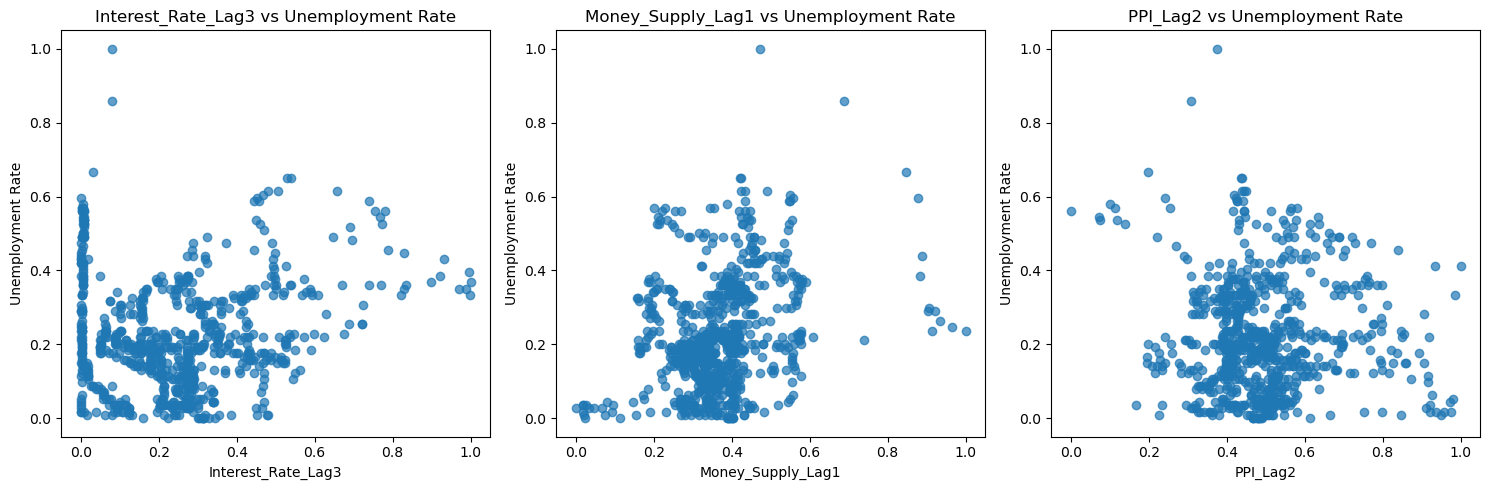

In [3]:
# Re-load all uploaded files due to environment reset
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the provided preprocessed files
unemployment_rate = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Unemployment_Rate_data_preprocessed.csv')
consumer_confidence = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Consumer_Confidence_data_preprocessed.csv')
cpi = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/CPI_data_preprocessed.csv')
gdp_growth = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/GDP_Growth_data_preprocessed.csv')
interest_rate = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Interest_Rate_data_preprocessed.csv')
money_supply = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/Money_Supply_data_preprocessed.csv')
ppi = pd.read_csv('C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/processed/preprocessed/PPI_data_preprocessed.csv')

# Merge all datasets
merged_data = unemployment_rate.merge(consumer_confidence, on='Date') \
    .merge(cpi, on='Date') \
    .merge(gdp_growth, on='Date') \
    .merge(interest_rate, on='Date') \
    .merge(money_supply, on='Date') \
    .merge(ppi, on='Date')

# Rename columns for readability
merged_data.rename(columns={
    'UNRATE': 'Unemployment_Rate',
    'UMCSENT': 'Consumer_Confidence',
    'CPIAUCSL': 'CPI',
    'A191RL1Q225SBEA': 'GDP_Growth',
    'FEDFUNDS': 'Interest_Rate',
    'M2SL': 'Money_Supply',
    'PPIACO': 'PPI'
}, inplace=True)

# Apply lags to predictors based on prior analysis
merged_data['Interest_Rate_Lag3'] = merged_data['Interest_Rate'].shift(3)
merged_data['Money_Supply_Lag1'] = merged_data['Money_Supply'].shift(1)
merged_data['PPI_Lag2'] = merged_data['PPI'].shift(2)

# Drop rows with NaN after introducing lags
lagged_data = merged_data.dropna()

# Re-visualize scatter plots with lagged predictors
lagged_predictors = ['Interest_Rate_Lag3', 'Money_Supply_Lag1', 'PPI_Lag2']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, predictor in enumerate(lagged_predictors):
    axes[i].scatter(lagged_data[predictor], lagged_data['Unemployment_Rate'], alpha=0.7)
    axes[i].set_title(f'{predictor} vs Unemployment Rate')
    axes[i].set_xlabel(predictor)
    axes[i].set_ylabel('Unemployment Rate')

plt.tight_layout()
output_dir = 'C:/Users/ghkjs/OneDrive/바탕 화면/EconomicIndicatorPrediction/data/EDA/scatter_plot'
png_save_path = os.path.join(output_dir,'lagged_scatter_plot.png')
# Save the plot as an image file
plt.savefig(png_save_path, format="png", dpi=300, bbox_inches="tight")
plt.show()
